<a href="https://colab.research.google.com/github/AugustoGuimaraesUFRJ/Machine-Learning/blob/main/Tarefa_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Augusto Guimarães Rodrrigues de Lima - DRE: 119025393

Filipe Castelo Branco de Souza - DRE: 119066195

Pima Indians Diabetes Database - Prever o aparecimento de diabetes com base em medidas de diagnóstico

## Importando Bibliotecas

In [1217]:
# Carregando Bibliotecas
import pandas as pd
from sklearn import metrics #Importa métrica para calcular acurácia - módulo do scikit-learn
from sklearn.model_selection import train_test_split
from six import StringIO  
import pydotplus
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


## Dataset

In [1218]:
dataset = pd.read_csv("diabetes.csv")

In [1219]:
# 5 primeiras linhas do dataset
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [1220]:
#  Informações das colunas
#  Nome, quantidade de valores não-nulos e tipo
print("nome X quantidade de valores não-nulos X tipo: ")
dataset.info()

nome X quantidade de valores não-nulos X tipo: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [1221]:
# Quantidade de linhas X colunas
print("quantidade de instancias X atributos: ")
dataset.shape

quantidade de instancias X atributos: 


(768, 9)

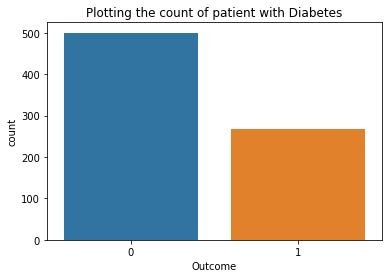

In [1222]:
# Numero de pessoas sem e com diabetes
sns.countplot(x=dataset.Outcome)
plt.title("Plotting the count of patient with Diabetes")
plt.show()

In [1223]:
dataset.Outcome.value_counts() #Retorna uma série contendo contagens de valores únicos.

0    500
1    268
Name: Outcome, dtype: int64

##Atributos






### Pregnancies

In [1224]:
# Número de vezes que uma pessoa ficou grávida
# Valores do atributo
print(dataset['Pregnancies'].value_counts()) #Retorna uma série contendo contagens de valores únicos.

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


### Glucose

In [1225]:
# Concentração de glicose no plasma durante 2 horas em um teste oral de tolerância à glicose
# Valores do atributo
print(dataset['Glucose'].value_counts()) #Retorna uma série contendo contagens de valores únicos.

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64


### BloodPressure

In [1226]:
# Pressão sanguinea (mmHg)
# Valores do atributo
print(dataset['BloodPressure'].value_counts()) #Retorna uma série contendo contagens de valores únicos.

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64


Observamos que faltavam informação em 35 casos (BloodPressure = 0). 

### SkinThickness             

In [1227]:
# Espessura da pele (mm)
# Valores do atributo
print(dataset['SkinThickness'].value_counts()) #Retorna uma série contendo contagens de valores únicos.

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64


Observamos que faltavam informação em 227 casos (SkinThickness = 0).

### Insulin

In [1228]:
# Taxa de insulina ((mu U/ml))
# Valores do atributo
print(dataset['Insulin'].value_counts()) #Retorna uma série contendo contagens de valores únicos.

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64


Observamos que faltavam informação em 374 casos (Insulin = 0).

### BMI

In [1229]:
# Índice de massa corporal (kg/(m)^2)
# Valores do atributo
print(dataset['BMI'].value_counts()) #Retorna uma série contendo contagens de valores únicos.

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64


Observamos que faltavam informação em 11 casos (BMI = 0). 

### DiabetesPedigreeFunction  

In [1230]:
# Predisposição para diabetes (Com base, no historico familiar)
# Valores do atributo
print(dataset['DiabetesPedigreeFunction'].value_counts()) #Retorna uma série contendo contagens de valores únicos.

0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64


### Age

In [1231]:
# Idade
# Valores do atributo
print(dataset['Age'].value_counts()) #Retorna uma série contendo contagens de valores únicos.

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64


## Corrigindo Missing Values

 Vamos substituir os valores que estão faltando pela média de cada atributo

In [1232]:
dataset['Glucose'].replace(to_replace=0, value= dataset['Glucose'].median(), inplace=True)
dataset['BloodPressure'].replace(to_replace=0, value= dataset['BloodPressure'].median(), inplace=True)
dataset['SkinThickness'].replace(to_replace=0, value= dataset['SkinThickness'].median(), inplace=True)
dataset['Insulin'].replace(to_replace=0, value= dataset['Insulin'].median(), inplace=True)
dataset['BMI'].replace(to_replace=0, value= dataset['BMI'].median(), inplace=True)

In [1233]:
dataset.shape

(768, 9)

## Verifica Linhas Duplicadas

In [1234]:
dataset.drop_duplicates().shape

(768, 9)

## Analisando a Correlação dos Atributos

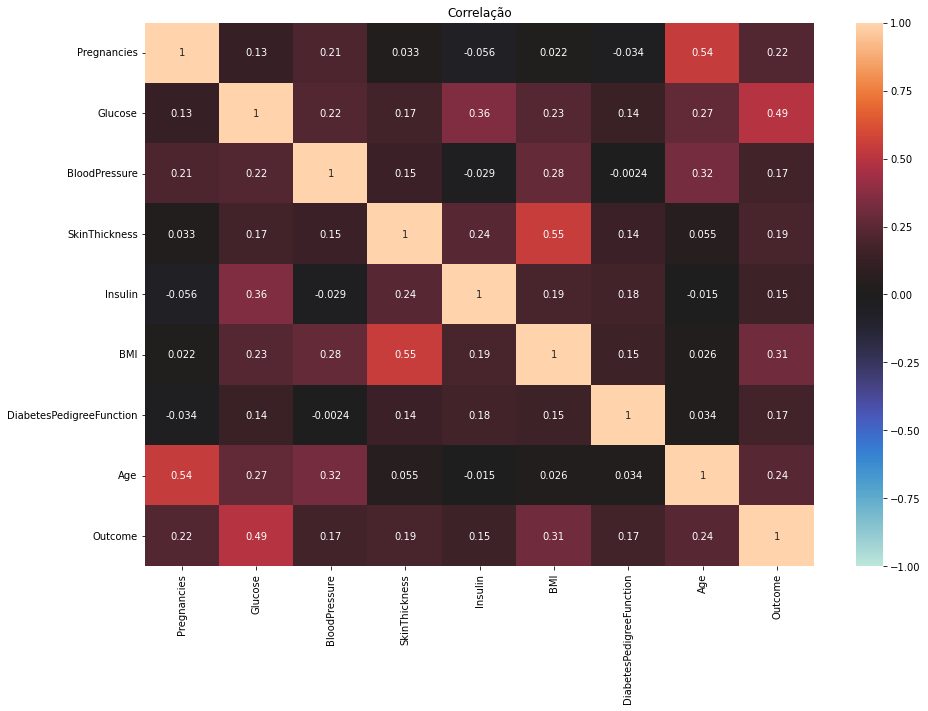

In [1235]:
# Correlação
features = dataset.columns
plt.figure(figsize=[15,10])
plt.title('Correlação')
sns.heatmap(dataset[features].corr(), vmin=-1, vmax=1, center=0, annot=True)  
plt.show()

Os atributos mais correlacionados com o Outcome são:  Glicose, BMI e Idade

##  Analisando a Variação de Dados do Dataset

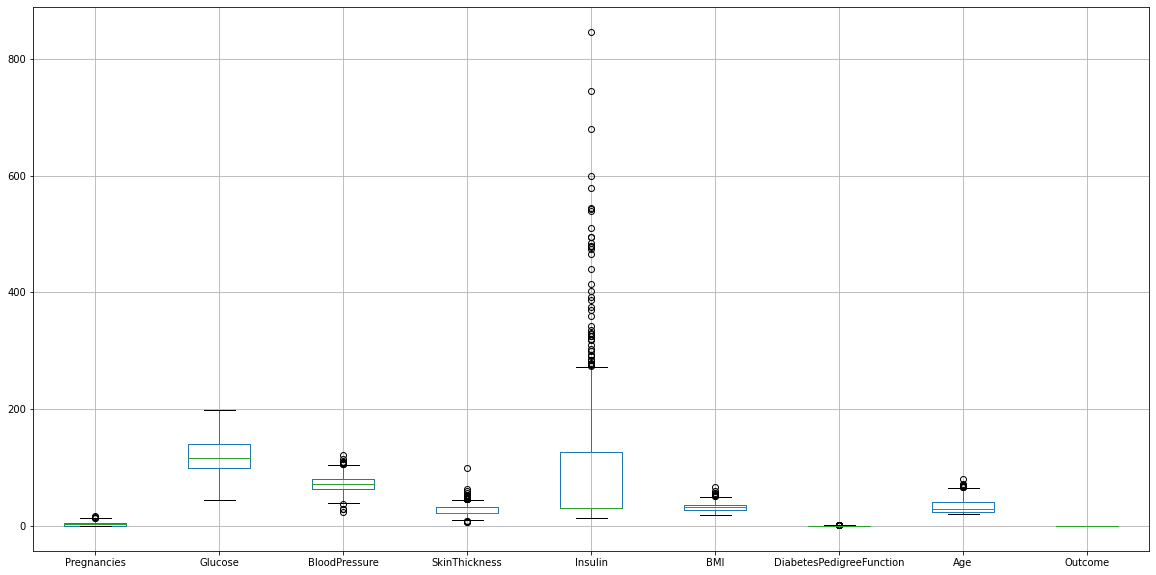

In [1236]:
dataset.boxplot(figsize=(20,10))

## Normalização

In [1237]:
# Vamos normalizar os dados
X = dataset.drop('Outcome', axis = 1)
y = dataset['Outcome']
def mean_norm(df_input):
    # A normalização é feita subtraindo a média e dividindo pelo desvio padrão para todos os elementos do dataframe.
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
X_nomalizado = mean_norm(X)

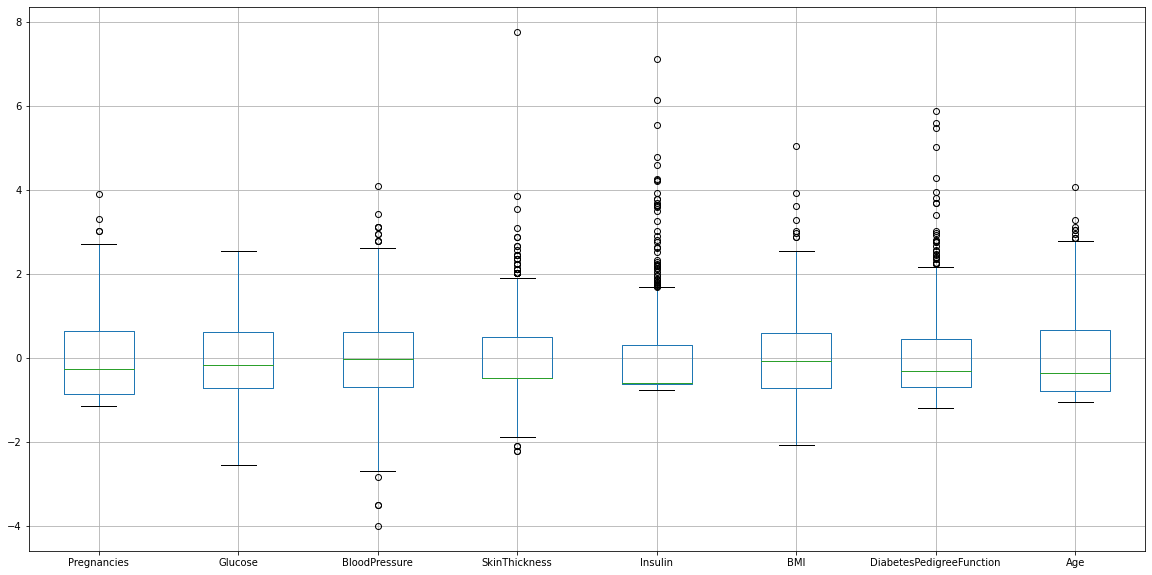

In [1238]:
X_nomalizado.boxplot(figsize=(20,10))

Há muitos outliers no dataset! 
Vamos trata-los posteriormente

In [1239]:
result = pd.concat([y, X_nomalizado], axis=1)

In [1240]:
# 5 primeiras linhas do dataset
result.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,0.639530,0.865481,-0.031969,0.830572,-0.607805,0.167131,0.468187,1.425067
1,0,-0.844335,-1.204281,-0.527975,0.180449,-0.607805,-0.850996,-0.364823,-0.190548
2,1,1.233077,2.015348,-0.693310,-0.469675,-0.607805,-1.330971,0.604004,-0.105515
3,0,-0.844335,-1.072868,-0.527975,-0.469675,-0.006181,-0.632826,-0.920163,-1.040871
4,1,-1.141108,0.504094,-2.677331,0.830572,0.694925,1.548876,5.481337,-0.020483


## Caso 1) Todos os Atributos sem Nenhum Tratamento
## Regressão Logística

In [1241]:
X1 = result.drop('Outcome', axis = 1)
y1 = result['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3)

In [1242]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

In [1243]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
#auc = metrics.accuracy_score(y_test, predictions)
#print(auc)

              precision    recall  f1-score   support

           0       0.80      0.86      0.82       154
           1       0.66      0.56      0.61        77

    accuracy                           0.76       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



[[132  22]
 [ 34  43]]


Text(0.5, 1.1, 'Confusion Matrix')

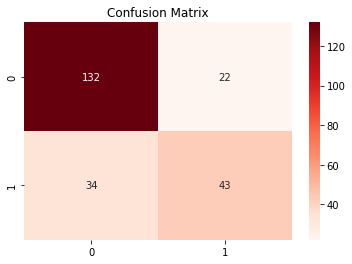

In [1244]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix, accuracy_score
cm_log = confusion_matrix(y_test,predictions)
print(cm_log)
sns.heatmap(pd.DataFrame(cm_log),cmap="Reds",annot=True,fmt='g')
plt.title('Confusion Matrix', y=1.1)

## SVM

In [1245]:
from sklearn import svm
clf = svm.SVC()
svc = clf.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, svc))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       154
           1       0.62      0.55      0.58        77

    accuracy                           0.74       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.73      0.74      0.73       231



[[128  26]
 [ 35  42]]


Text(0.5, 1.1, 'Confusion Matrix')

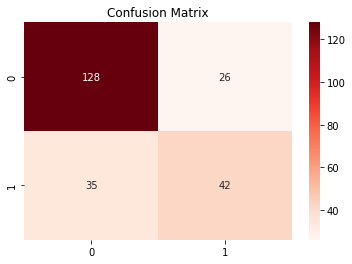

In [1246]:
cm_svm = confusion_matrix(y_test,svc)
print(cm_svm)
sns.heatmap(pd.DataFrame(cm_svm),cmap="Reds",annot=True,fmt='g')
plt.title('Confusion Matrix', y=1.1)

## Bayes

In [1247]:
 from sklearn.naive_bayes import GaussianNB
 gnb = GaussianNB()
 bayes = gnb.fit(X_train, y_train).predict(X_test)
 print(classification_report(y_test, bayes))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       154
           1       0.60      0.60      0.60        77

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



[[123  31]
 [ 31  46]]


Text(0.5, 1.1, 'Confusion Matrix')

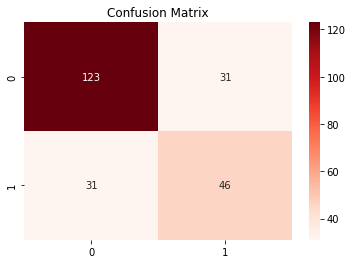

In [1248]:
cm_bayes = confusion_matrix(y_test,bayes)
print(cm_bayes)
sns.heatmap(pd.DataFrame(cm_bayes),cmap="Reds",annot=True,fmt='g')
plt.title('Confusion Matrix', y=1.1)

## Executando 5 vezes, no geral, a Regressão Logística apresentou as melhores métricas e o Naive Bayes as piores.

## Caso 2) Atributos mais Correlacionados
## Regressão Logística

In [1249]:
# Glicose, BMI e idade
atributos_novos1 = ["Outcome","Glucose", "BMI", "Age"]
diabetes_data = result[atributos_novos1]
x_novo1 = diabetes_data.drop('Outcome', axis = 1)
y_novo1 = diabetes_data["Outcome"]
X1_train, X1_test, y1_train, y1_test = train_test_split(x_novo1, y_novo1, test_size = 0.3)

In [1250]:
logreg = LogisticRegression()
logreg.fit(X1_train, y1_train)
predictions1 = logreg.predict(X1_test)

In [1251]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, predictions1))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       150
           1       0.73      0.59      0.65        81

    accuracy                           0.78       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.78      0.77       231



[[132  18]
 [ 33  48]]


Text(0.5, 1.1, 'Confusion Matrix')

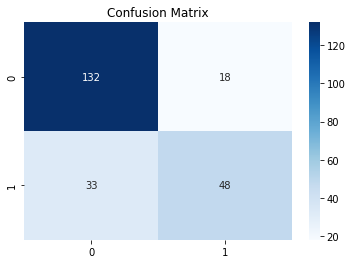

In [1252]:
cm_log1 = confusion_matrix(y1_test,predictions1)
print(cm_log1)
sns.heatmap(pd.DataFrame(cm_log1),cmap="Blues",annot=True,fmt='g')
plt.title('Confusion Matrix', y=1.1)

##  SVM

In [1253]:
from sklearn import svm
clf = svm.SVC()
svc1 = clf.fit(X1_train, y1_train).predict(X1_test)
print(classification_report(y1_test, svc1))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       150
           1       0.71      0.63      0.67        81

    accuracy                           0.78       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



[[128  26]
 [ 35  42]]


Text(0.5, 1.1, 'Confusion Matrix')

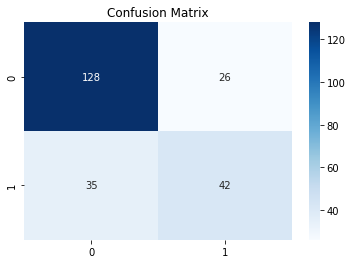

In [1254]:
cm_svm1 = confusion_matrix(y_test,svc)
print(cm_svm1)
sns.heatmap(pd.DataFrame(cm_svm1),cmap="Blues",annot=True,fmt='g')
plt.title('Confusion Matrix', y=1.1)

## Bayes

In [1255]:
 from sklearn.naive_bayes import GaussianNB
 gnb = GaussianNB()
 bayes1 = gnb.fit(X1_train, y1_train).predict(X1_test)
 print(classification_report(y1_test, bayes1))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       150
           1       0.72      0.60      0.66        81

    accuracy                           0.78       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.78      0.77       231



[[131  19]
 [ 32  49]]


Text(0.5, 1.1, 'Confusion Matrix')

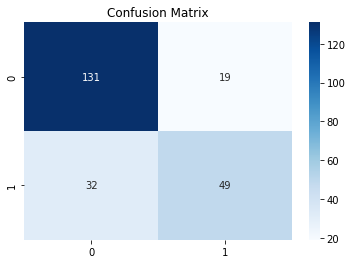

In [1256]:
cm_bayes1 = confusion_matrix(y1_test,bayes1)
print(cm_bayes1)
sns.heatmap(pd.DataFrame(cm_bayes1),cmap="Blues",annot=True,fmt='g')
plt.title('Confusion Matrix', y=1.1)

## Esperavamos obter alguma mudança pegando os atributos mais correlacionados com o Outcome. O que não aconteceu. O que leva a creer que possivelmente os outros atributos não tem impacto significativo na costrução da árvore.
## Executando 10 vezes, não observamos nenhum destaque entre os modelos de Regressão Logistica, SVM e Naive Bayes.


## Tratando Outliers

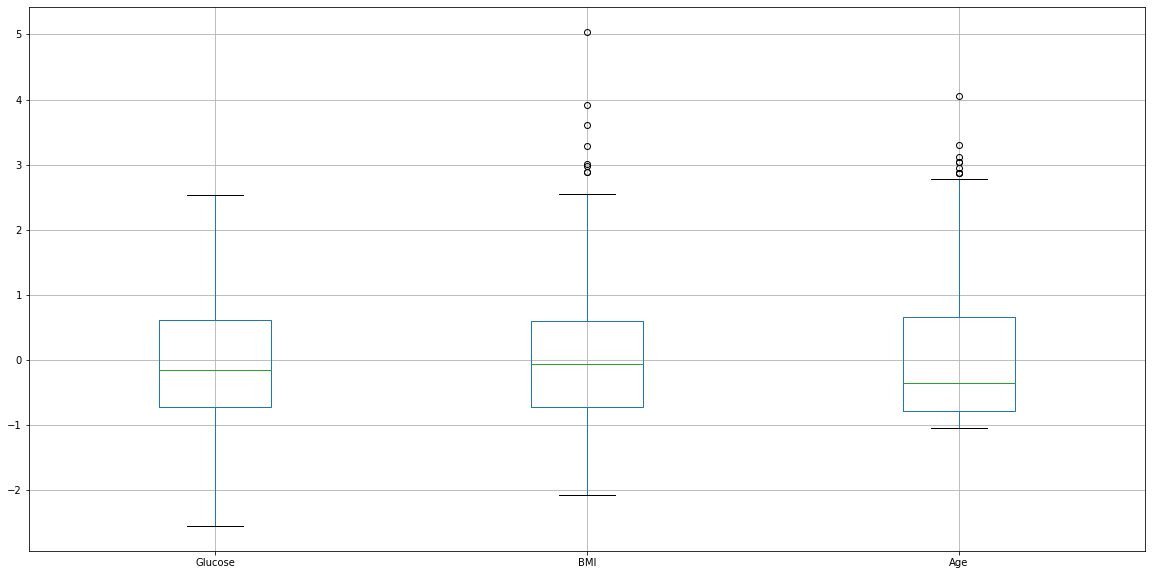

In [1257]:
x_novo1.boxplot(figsize=(20,10))

In [1258]:
# Método de John Tukey
# Utiliza a faixa interquartil para peneirar números enormes ou extremamente pequenos. 
from numpy import percentile
total=0
for column in diabetes_data.columns:
    q25, q75 = percentile(diabetes_data[column], 25), percentile(diabetes_data[column], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identifica outliers
    outliers = [x for x in diabetes_data[column] if x < lower or x > upper]
    print("Coluna: ",column)
    print('Outliers encontrados: %d' % len(outliers))
    print()
    total+=len(outliers)
    # remove outliers
    outliers_removed = [x for x in diabetes_data[column] if x >= lower and x <= upper]
    diabetes_data = diabetes_data[diabetes_data[column] < upper]
print("Total de outliers: ",total)

Coluna:  Outcome
Outliers encontrados: 0

Coluna:  Glucose
Outliers encontrados: 0

Coluna:  BMI
Outliers encontrados: 8

Coluna:  Age
Outliers encontrados: 9

Total de outliers:  17


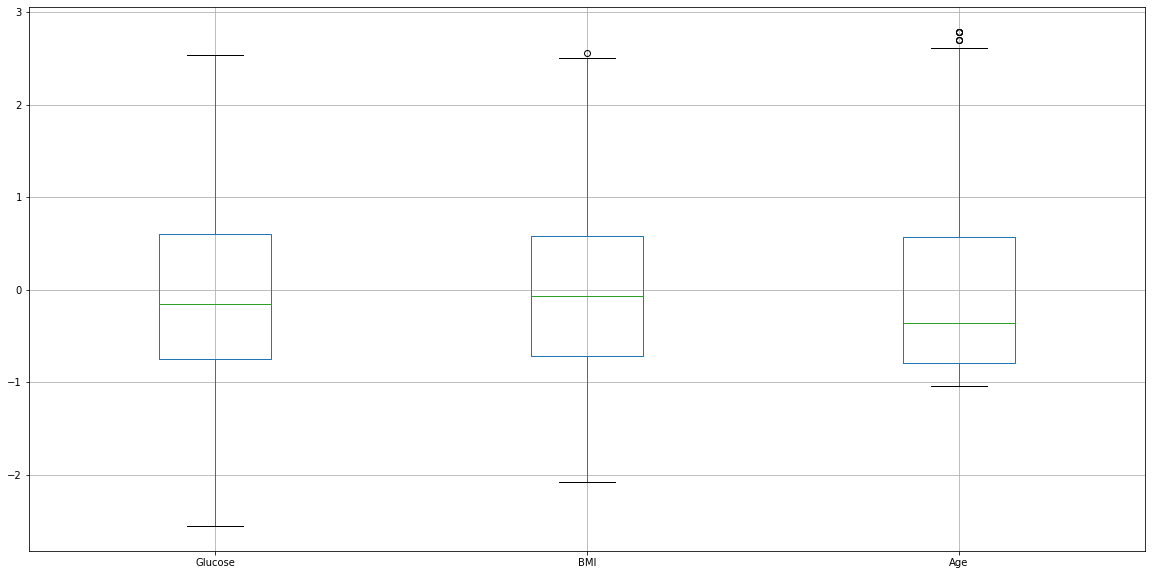

In [1259]:
x_novo2 = diabetes_data.drop('Outcome', axis = 1)
x_novo2.boxplot(figsize=(20,10))

## Caso 3) Atributos mais Correlacionados com Outliers Tratados
## Regressão Logística

In [1260]:
x_novo2 = diabetes_data.drop('Outcome', axis = 1)
y_novo2 = diabetes_data["Outcome"]
X2_train, X2_test, y2_train, y2_test = train_test_split(x_novo2, y_novo2, test_size = 0.3)

In [1261]:
logreg = LogisticRegression()
logreg.fit(X2_train, y2_train)
predictions2 = logreg.predict(X2_test)

In [1262]:
from sklearn.metrics import classification_report
print(classification_report(y2_test, predictions2))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       150
           1       0.67      0.58      0.62        76

    accuracy                           0.76       226
   macro avg       0.73      0.72      0.72       226
weighted avg       0.76      0.76      0.76       226



[[128  22]
 [ 32  44]]


Text(0.5, 1.1, 'Confusion Matrix')

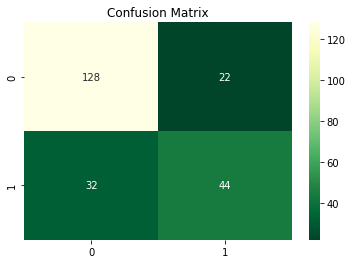

In [1263]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix, accuracy_score
cm_log2 = confusion_matrix(y2_test,predictions2)
print(cm_log2)
sns.heatmap(pd.DataFrame(cm_log2),cmap="YlGn_r",annot=True,fmt='g')
plt.title('Confusion Matrix', y=1.1)

## SVM

In [1264]:
from sklearn import svm
clf = svm.SVC()
svc2 = clf.fit(X2_train, y2_train).predict(X2_test)
print(classification_report(y2_test, svc2))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       150
           1       0.71      0.54      0.61        76

    accuracy                           0.77       226
   macro avg       0.75      0.71      0.72       226
weighted avg       0.76      0.77      0.76       226



[[133  17]
 [ 35  41]]


Text(0.5, 1.1, 'Confusion Matrix')

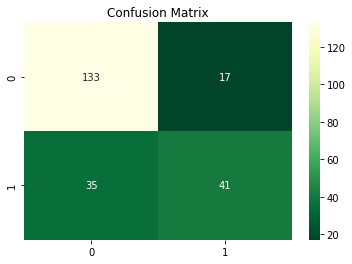

In [1265]:
cm_svm2 = confusion_matrix(y2_test,svc2)
print(cm_svm2)
sns.heatmap(pd.DataFrame(cm_svm2),cmap="YlGn_r",annot=True,fmt='g')
plt.title('Confusion Matrix', y=1.1)

## Bayes

In [1266]:
 gnb = GaussianNB()
 bayes2 = gnb.fit(X2_train, y2_train).predict(X2_test)
 print(classification_report(y2_test, bayes2))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       150
           1       0.64      0.62      0.63        76

    accuracy                           0.75       226
   macro avg       0.72      0.72      0.72       226
weighted avg       0.75      0.75      0.75       226



[[123  27]
 [ 29  47]]


Text(0.5, 1.1, 'Confusion Matrix')

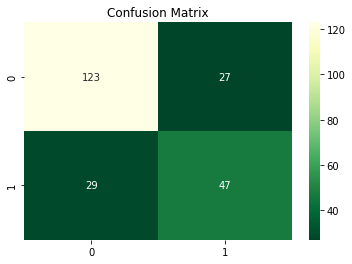

In [1267]:
cm_bayes2 = confusion_matrix(y2_test,bayes2)
print(cm_bayes2)
sns.heatmap(pd.DataFrame(cm_bayes2),cmap="YlGn_r",annot=True,fmt='g')
plt.title('Confusion Matrix', y=1.1)

##  Esperavamos obter alguma melhorias removenddo os outliers. O que não aconteceu. 
## Executando 10 vezes, não observamos nenhum destaque entre os modelos de Regressão Logistica, SVM e Naive Bayes.